In [84]:
import os
import sys
import matplotlib.pyplot as plt
import random
import torch
import torch.utils.data as data
import torch.nn as nn
import numpy as np
import pandas as pd

if os.path.abspath('..') not in sys.path:
    sys.path.insert(0, os.path.abspath('..'))

if os.path.abspath('../..') not in sys.path:
    sys.path.insert(0, os.path.abspath('../..'))
from Evaluate.evaluate import *

from utils.processing import crop
from utils.heatmap_generator import HeatmapGenerator
from NetworkTrainer.network_trainer import *
from DataLoader.dataloader_IVDsegmentation import landmark_extractor


In [85]:
MRfile_path = 'G:/SpineSegmentation/Spine_Segmentation/Spine_Segmentation/Case5/MR.nii.gz'
MR = sitk.ReadImage(MRfile_path , sitk.sitkFloat32)
MR = sitk.GetArrayFromImage(MR)[np.newaxis, :, :, :]
MR = np.clip(MR / 2048, a_min=0, a_max=1)

In [86]:
landmarkfile_path = 'G:/SpineSegmentation/Spine_Segmentation/Spine_Segmentation/Case5/landmarks.csv'
landmarks = pd.read_csv(landmarkfile_path)
landmarks = landmark_extractor(landmarks)
list_landmarks = landmarks


In [87]:
_,D, H, W = MR.shape
heatmap_generator = HeatmapGenerator(image_size=(D, H, W),
                                         sigma=2.,
                                         scale_factor=1.,
                                         normalize=True,
                                         size_sigma_factor=8,
                                         sigma_scale_factor=2,
                                         dtype=np.float32)

In [88]:
#for index, landmark in enumerate(list_IVD_landmarks):
    #index
    #pred_Mask += np.where(Mask == index + 2 , 1, 0)
index = random.randint(0, 18)
while True in np.isnan(list_landmarks[index]):
    index = random.randint(0, 18)
heatmap = heatmap_generator.generate_heatmap(landmark=list_landmarks[index])[np.newaxis, :, :, :]

In [89]:
index

0

In [90]:
heatmap.shape

(1, 12, 256, 256)

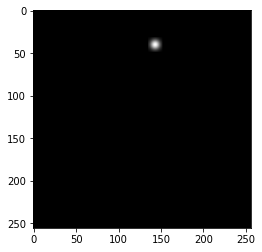

In [91]:
plt.imshow(heatmap[0][6], cmap='gray')

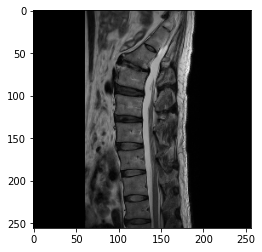

In [92]:
plt.imshow(MR[0][6], cmap='gray')

In [93]:
dataset =  [MR, heatmap]
loader = data.DataLoader(dataset=dataset, batch_size=2, shuffle=True, num_workers=4,
                             pin_memory=True)
for batch_idx, case in tqdm(enumerate(loader)):
    input_ = case[0]  # tensor: (batch_size, C, D, H, W)
    target = case[1:]

1it [00:00,  4.28it/s]


In [94]:
input_.shape

torch.Size([1, 12, 256, 256])

In [95]:
target.shape

torch.Size([1, 1, 12, 256, 256])

In [96]:
loss = nn.L1Loss()

loss(input_,target)
input_ = input_[np.newaxis,:, :, :, :]

In [99]:
temp = torch.zeros(1, 1, 12, 256, 256)
temp1 = torch.zeros(1, 1, 12, 256, 256)
temp = torch.cat((temp, input_),dim=1)
temp = torch.cat((temp, temp1),dim=1)

temp.shape

torch.Size([1, 3, 12, 256, 256])

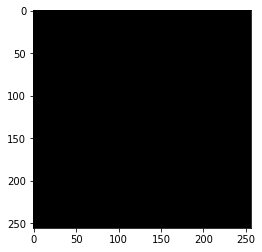

In [103]:
plt.imshow(temp[0][2][6], cmap='gray')


